In [201]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn import cross_validation
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [202]:
df = pd.read_excel("data0505.xlsx",header=0)
# clean up data
df = df.dropna(how = 'all')
df = df.fillna(0)
df = df.round(4)
df=df[df['Power']>=0]
df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
10,80,1.0,0.0526,23,0.0,44.8776
11,80,1.0,0.1579,23,0.0,46.1896
12,80,1.0,0.2632,23,0.0,47.5605
13,80,1.0,0.3684,23,0.0,48.9998
14,80,1.0,0.4737,23,0.0,50.4819


In [203]:
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(np_scaled)
# df_normalized.head()

In [204]:
x = np.array(df.iloc[:,0:3])#first three column are SoC, SoH, power
y = np.array(df.iloc[:,5])#delta SEI
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
x, y, test_size=0.2, random_state=42)
total_len = X_train.shape[0]
total_len

4880

In [205]:
y

array([ 44.8776,  46.1896,  47.5605, ...,  52.5202,  53.8887,  55.2809])

In [206]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.4f"
      % np.mean((regr.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Coefficients: 
 [  3.33356517e-03  -9.79759843e-01   1.09445592e+01]
Mean squared error: 5.7812
Variance score: 0.67


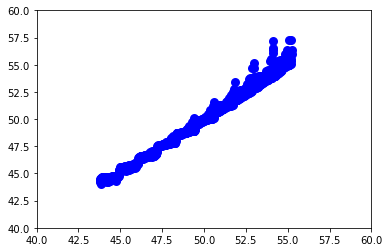

In [208]:
# Plot outputs
plt.scatter(regr.predict(X_test), Y_test, color='blue',
         linewidth=3)
plt.ylim([40,60])
plt.xlim([40,60])
plt.show()

In [209]:
E = 1; # battery energy
P = 1; # battery power
T = 900; # 1 hour, resolution 4 seconds
ts = 4/3600;

In [210]:
## Constant instruction signal
soc_arr = [0.2]; #initial SoC 0.2
soh_arr = [10**(-8)]; #initial SoH 1e-8
power_arr = [0.6]; #constant power instruction 0.6
for i in range(T):
    state = [soc_arr[i],soh_arr[i],power_arr[i]]
    state = np.array(state);
    delta_soh = regr.predict(state.reshape(1, -1))*10**(-16) #calculate the thickness change
    soh_new = soh_arr[-1]+delta_soh; # new SoH = previous SoH + thickness change
    soh_arr.append(soh_new)
    soc_new = soc_arr[-1]+(power_arr[-1]*ts)/E #new SoC = previous SoC + energy charged
    soc_arr.append(soc_new)
    power_new = 0.6
    power_arr.append(power_new)

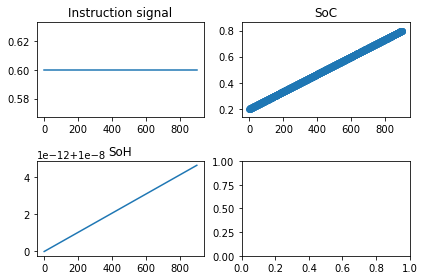

In [211]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(range(T), power_arr[0:T])
axarr[0, 0].set_title('Instruction signal')
axarr[0, 1].scatter(range(T), soc_arr[0:T])
axarr[0, 1].set_title('SoC')
axarr[1, 0].plot(range(T), soh_arr[0:T])
axarr[1, 0].set_title('SoH')
plt.subplots_adjust(left= 0.125, right = 0.9, bottom = 0.1, top = 0.9 , wspace = 0.2, hspace = 0.2 )
plt.tight_layout()
plt.show()

In [212]:
## Sine wave instruction signal
soc_arr = [0.6];
soh_arr = [10**(-8)];
power_arr = [0];

In [216]:
for i in range(T):
    state = [soc_arr[i],soh_arr[i],np.maximum(power_arr[i],0)]
    state = np.array(state);
    delta_soh = regr.predict(state.reshape(1, -1))*10**(-16)
    soh_new = soh_arr[-1]+delta_soh;
    soh_arr.append(soh_new)
    soc_new = soc_arr[-1]+(power_arr[-1]*ts)/E
    soc_arr.append(soc_new)
    power_new = 3*np.sin(2*np.pi*(i+1)*4/600)
    power_arr.append(power_new)

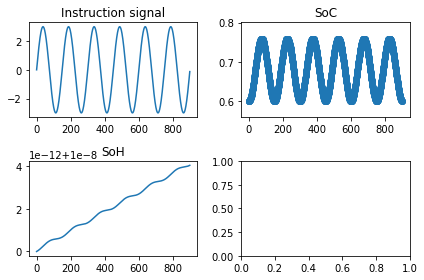

In [217]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(range(T), power_arr[0:T])
axarr[0, 0].set_title('Instruction signal')
axarr[0, 1].scatter(range(T), soc_arr[0:T])
axarr[0, 1].set_title('SoC')
axarr[1, 0].plot(range(T), soh_arr[0:T])
axarr[1, 0].set_title('SoH')
plt.subplots_adjust(left= 0.125, right = 0.9, bottom = 0.1, top = 0.9 , wspace = 0.2, hspace = 0.2 )
plt.tight_layout()
plt.show()
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots